In [1]:
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:20,.2f}'.format

RENT = 1100
EXPENDABLE_INCOME = 2000
TAXES_PCT = 1
INTEREST_RATE_PCT = 3
RESERVES_PCT = 1
PROPERTY_BUY_VALUE = 500000
CAPTIAL = 100000
BUY_VALUE = 500000
EXPECTED_STOCK_MARKET_RETURNS = 0.05
EXPECTED_HOUSING_MARKET_RETURNS = 0.03



def buy_by_year(year):
    
    #-CAPTIAL + 
    return year ** 2


def calc_rent_stock_returns(max_year, captial, exp_stock_returns, expendable_income, rent):
    depot = (1 + exp_stock_returns/12) * np.ones(max_year * 12)
    depot = np.cumprod(depot) / (1 + exp_stock_returns/12)
    depot = ((expendable_income - rent) * depot)
    depot = np.cumsum(depot)
    depot = depot.reshape(max_year,12)[:,11]


    start_captial = (1 + exp_stock_returns/12) * np.ones(max_year * 12)
    start_captial = np.cumprod(start_captial) * captial 
    start_captial = start_captial.reshape(max_year,12)[:,11]

    depot += start_captial
    
    return depot


def calc_rent_spent(max_year, rent, exp_rent_increase):
    rent_increase = (1 + exp_rent_increase) * np.ones(max_year)
    rent_increase = np.cumprod(rent_increase) / (1 + exp_rent_increase)
    rent_spent = np.cumsum(rent * 12 * rent_increase)

    return rent_spent


def buy_value_increase(max_year, property_start_value, expected_housing_market_returns):
    value_increase = np.ones(max_year) * (1 + expected_housing_market_returns)
    value_increase[0] = property_start_value
    value_increase = np.cumprod(value_increase)

    return value_increase


def reserves(max_year, property_start_value, reserves_per_year):
    reserves_amount = property_start_value * reserves_per_year
    reserves_acc = np.ones(max_year) * reserves_amount
    reserves_acc = np.cumsum(reserves_acc)

    return reserves_acc


def debt(max_year, interest_rate, buying_cost, capital, side_cost, expendable_income):
    annuity = expendable_income * 3
    credit_len = 0
    rest_credit = buying_cost * (1 + side_cost) - capital
    result = np.zeros(max_year * 4)
    while(rest_credit > 0):
        rest_credit = rest_credit * (1 + interest_rate/4) - annuity
        result[credit_len] = rest_credit if rest_credit > 0 else 0
        credit_len += 1

    result = result.reshape(max_year,4)[:,3]
    return result

def calc_table(max_year, rent=1100, expendable_income=2000, taxes=0.01,
               interest_rate=0.03, reserves_per_year=0.01, property_value=500000, capital=100000, side_cost=0.10,
               avg_stock_market_returns=0.07, avg_housing_market_returns=0.03, exp_rent_increase=0.01):
    rent_amounts = []
    buy_amounts = []
    rent_spent_amounts = calc_rent_spent(max_year, rent, exp_rent_increase)
    rent_stock_returns_amounts = calc_rent_stock_returns(max_year, capital, avg_stock_market_returns, expendable_income, rent)
    debts = debt(max_year, interest_rate, property_value, capital, side_cost, expendable_income)
    buy_value_increases = buy_value_increase(max_year, property_value, avg_housing_market_returns)
    reserves_amounts = reserves(max_year, property_value, reserves_per_year)
    
    for year in range(0, max_year): 
        rent_amounts.append(rent_stock_returns_amounts[year] - rent_spent_amounts[year])
        buy_amounts.append(buy_value_increases[year] - debts[year] - reserves_amounts[year])

    return pd.DataFrame({'buy': buy_amounts, 'rent': rent_amounts, 'rent_spent': rent_spent_amounts,
                         'rent_stock_returns': rent_stock_returns_amounts, 'buy_debt': debts,
                        'buy_value_increase': buy_value_increases, 'buy_reserves': reserves_amounts})

In [2]:
calc_table(60).tail()

,buy,rent,rent_spent,rent_stock_returns,buy_debt,buy_value_increase,buy_reserves
55,"2,261,074.30","11,532,222.94","984,468.96","12,516,691.90",0.00,"2,541,074.30","280,000.00"
56,"2,332,306.52","12,425,164.25","1,007,513.65","13,432,677.90",0.00,"2,617,306.52","285,000.00"
57,"2,405,825.72","13,384,091.81","1,030,788.79","14,414,880.60",0.00,"2,695,825.72","290,000.00"
58,"2,481,700.49","14,413,790.13","1,054,296.68","15,468,086.81",0.00,"2,776,700.49","295,000.00"
59,"2,560,001.51","15,519,389.74","1,078,039.64","16,597,429.38",0.00,"2,860,001.51","300,000.00"


In [3]:
buying_costs = 400_000 * 1.10
EK = 10_000
credit = buying_costs - EK
annuity = 2000 * 3
interest_rate = 0.03

credit_len = 0
rest_credit = credit
result = np.zeros(60 * 4)
while(rest_credit > 0):
    rest_credit = rest_credit * (1 + 0.03/4) - annuity
    result[credit_len] = rest_credit if rest_credit > 0 else 0
    credit_len += 1

result = result.reshape(60,4)[:,3]

def reserves(max_year, property_start_value, reserves_per_year):
    reserves_amount = property_start_value * reserves_per_year
    reserves_acc = np.ones(max_year) * reserves_amount
    reserves_acc = np.cumsum(reserves_acc)

    return reserves_acc

def debt(max_year, interest_rate, buying_cost, capital, side_cost, expendable_income):
    annuity = expendable_income * 3
    credit_len = 0
    rest_credit = buying_cost * (1 + side_cost) - capital
    result = np.zeros(max_year * 4)
    while(rest_credit > 0):
        rest_credit = rest_credit * (1 + interest_rate/4) - annuity
        result[credit_len] = rest_credit if rest_credit > 0 else 0
        credit_len += 1

    result = result.reshape(max_year,4)[:,3]
    return result

debt(30, 0.03, 500000, 100000, 0.10, 2000)

array([439381.28326758, 428440.4032636 , 417167.58581516, 405552.76020882,
       393585.55019388, 381255.26471258, 368550.88834913, 355461.07148891,
       341974.12017921, 328077.98568226, 313760.2537113 , 299008.1333402 ,
       283808.44557647, 268147.61158763, 252011.64057045, 235386.11725203,
       218256.18901177, 200606.55261256, 182421.44052948, 163684.60686367,
       144379.31282883, 124488.31179744, 103993.83389325,  82877.57011638,
        61120.65598666,  38703.65469091,  15606.53971872,      0.        ,
            0.        ,      0.        ])

In [4]:
import matplotlib.pyplot as plt

from matplotlib.figure import Figure


def plot(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital, side_cost,
         avg_stock_market_returns, avg_housing_market_returns, exp_rent_increase):
    df = calc_table(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital, side_cost,
                    avg_stock_market_returns, avg_housing_market_returns, exp_rent_increase)
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()
    plt.plot(df["rent"], label="rent")
    # plt.plot(df["rent_spent"], label="rent spent")
    # plt.plot(df["rent_stock_returns"], label="rent stock returns")
    plt.plot(df["buy"], label="buy")
    plt.ticklabel_format(style='plain')
    plt.legend()
    return fig

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] IntSlider(end=60, name='max_year', value=60)
            [1] IntSlider(end=3000, name='rent', start=800, step=50, value=1100)
            [2] IntSlider(end=3000, name='expendable_income', start=1500, step=100, value=2000)
            [3] FloatSlider(end=0.03, name='taxes', start=-0.01, value=0.01)
            [4] FloatSlider(end=0.09, name='interest_rate', start=-0.03, value=0.03)
            [5] FloatSlider(end=0.03, name='reserves_per_year', start=-0.01, value=0.01)
            [6] IntSlider(end=1500000, name='property_value', start=250000, step=10000, value=500000)
            [7] IntSlider(end=500000, name='capital', step=10000, value=100000)
            [8] FloatSlider(end=0.2, name='side_cost', start=0.01, step=0.01, value=0.09999999999999999)
            [9] FloatSlider(end=0.2, name='avg_stock_market_returns'..., step=0.01, value=0.07)
            [10] FloatSlider(end=0.1, name='avg_housing_market_return..., step=0.01, value=0.03)
            [11] FloatSlider(name='exp_rent_increase', step=0.01, value=0.01)
        [1] Row
            [0] Matplotlib(Figure, height=1080, name='interactive00139', width=1080)
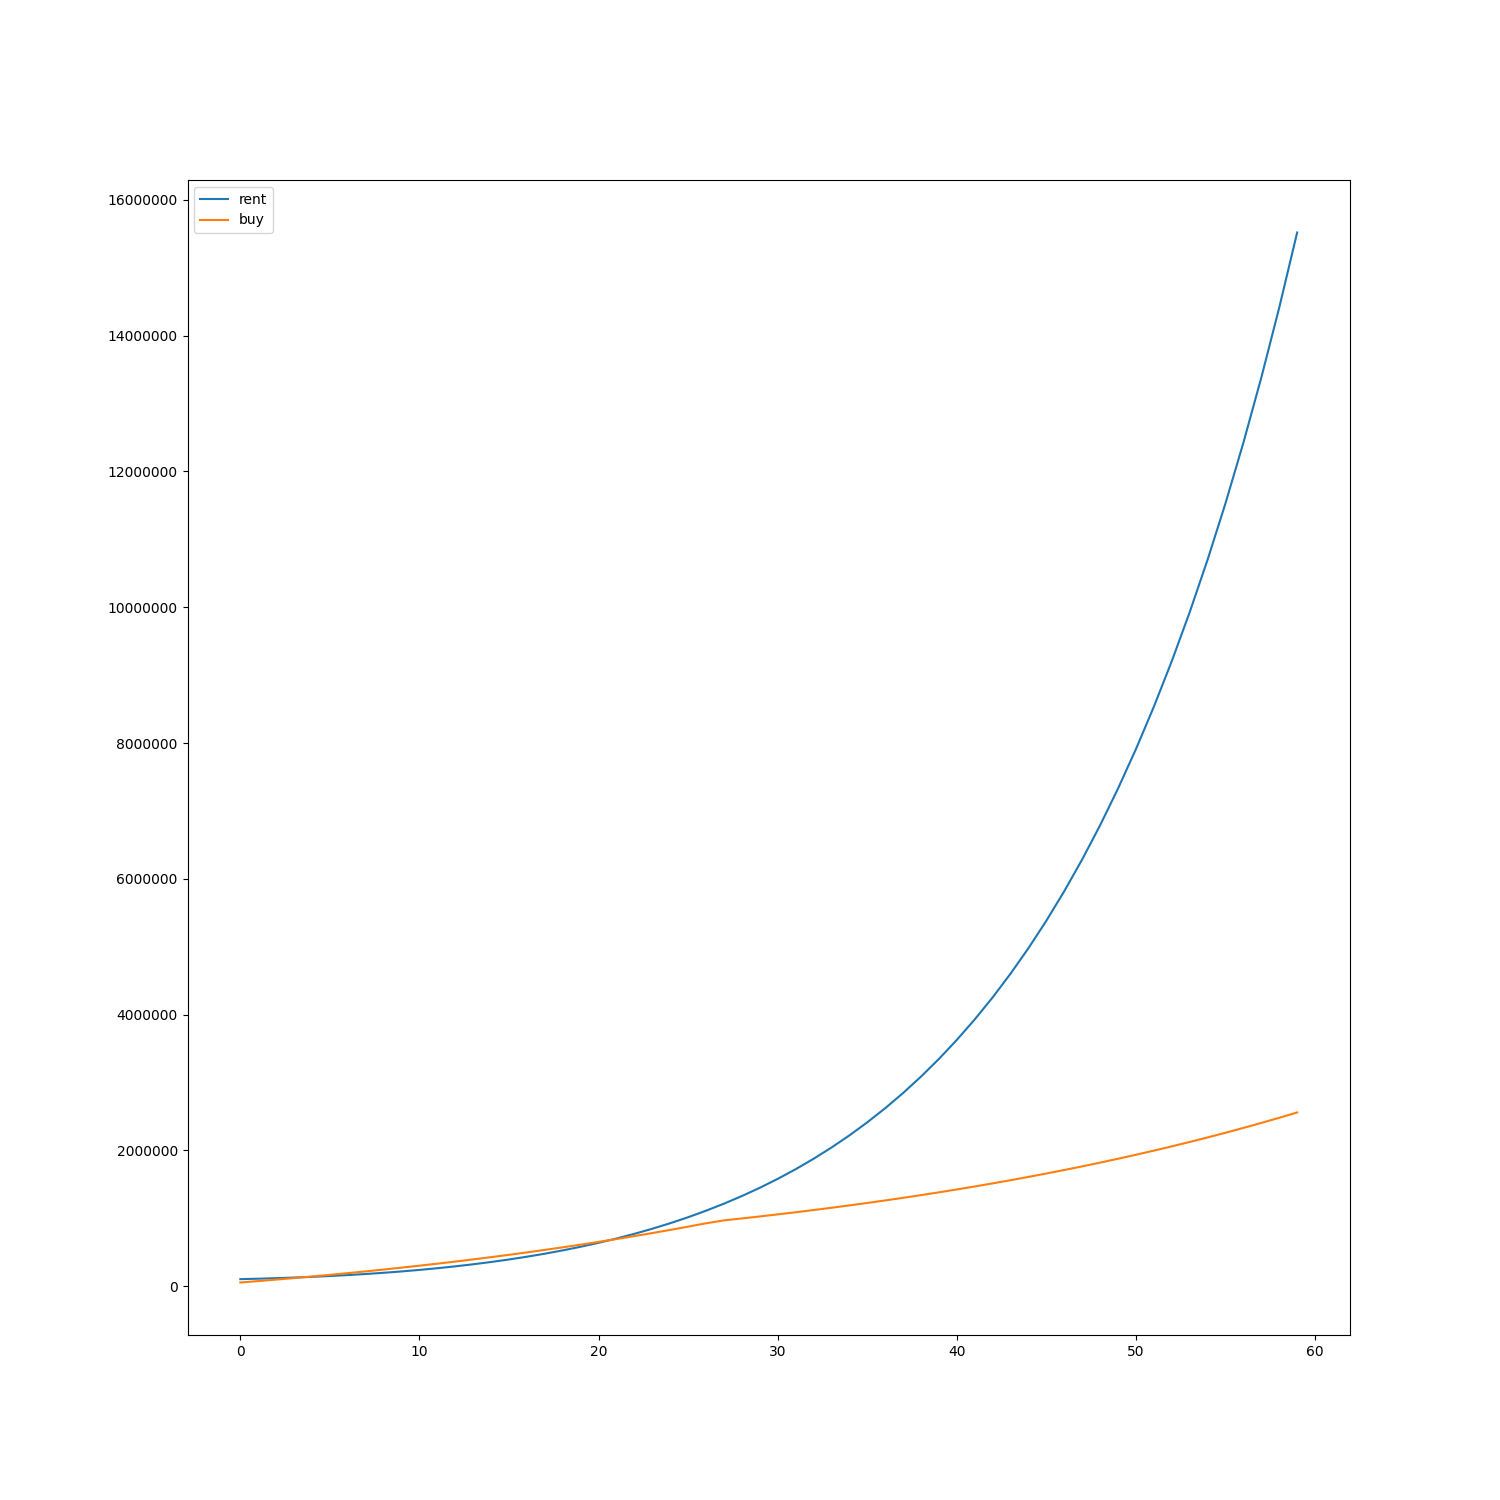

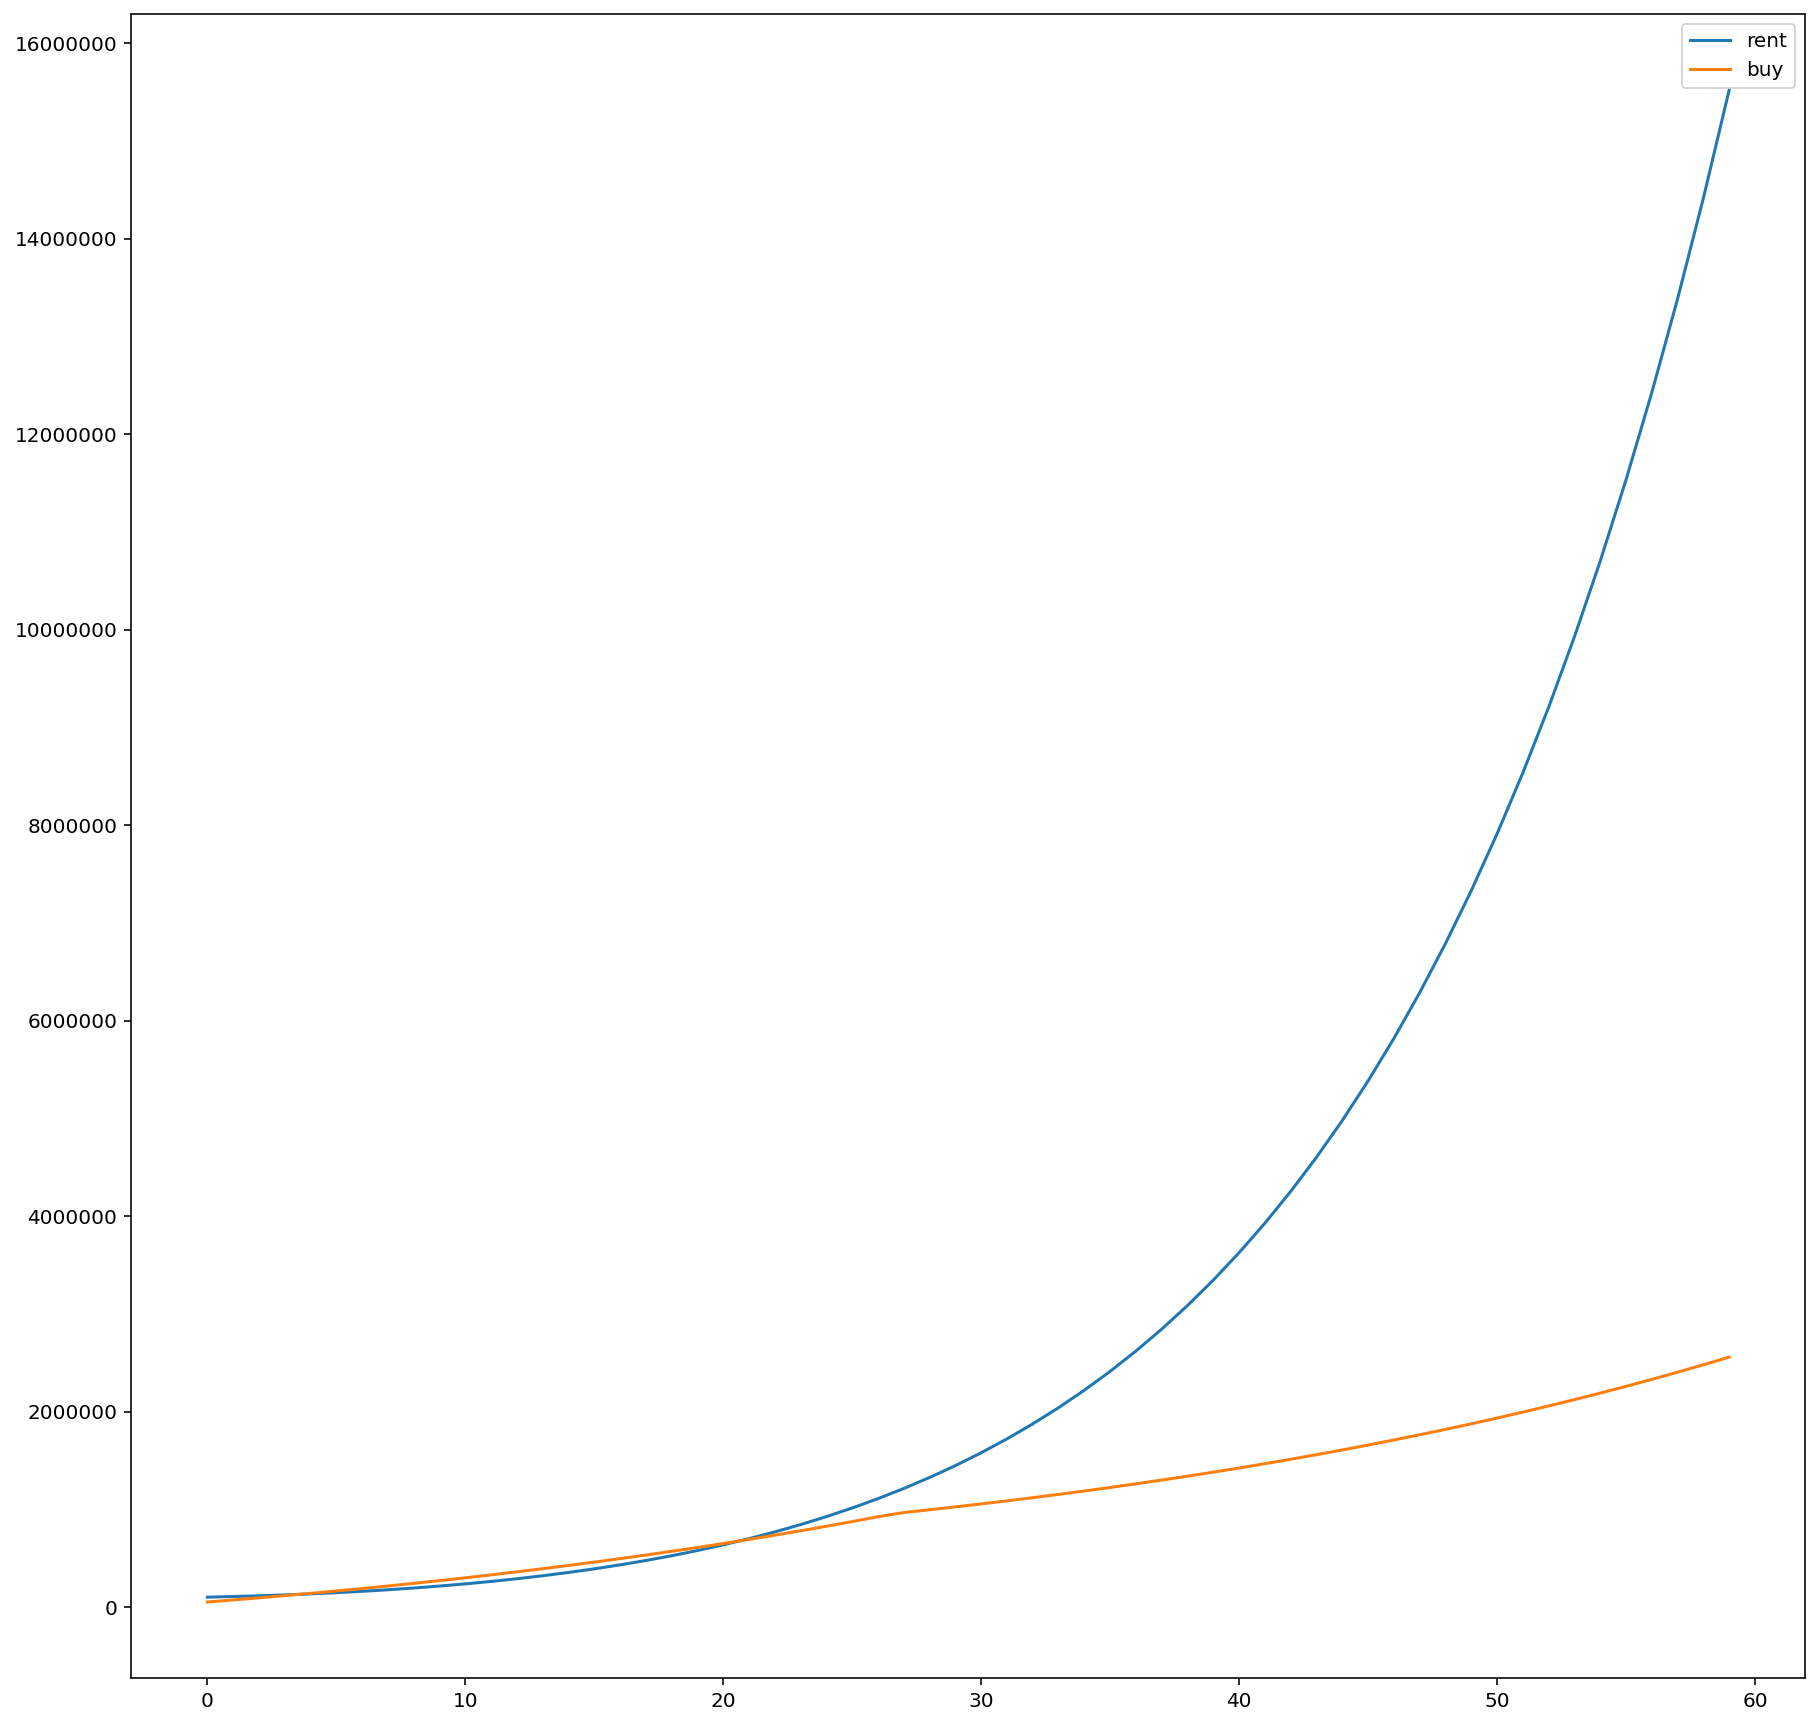

In [6]:
import panel as pn

from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

pn.extension()

layout = interact(plot, max_year=(0, 60, 1, 60), rent=(800, 3000, 50, 1100), expendable_income=(1500, 3000, 100, 2000),
                  taxes=0.01, interest_rate=0.03, reserves_per_year=0.01, property_value=(250000, 1500000, 10000, 500000),
                  capital=(0, 500000, 10000, 100000), side_cost=(0.01, 0.20, 0.01, 0.10), avg_stock_market_returns=(0,0.2,0.01,0.07), avg_housing_market_returns=(0,0.1,0.01,0.03), exp_rent_increase=(0, 1, 0.01, 0.01))

pn.Column('Buy vs rent over time', pn.Row(layout[0], layout[1]))